## PES 2019 RATINGS vs FIFA 19 RATINGS

## A comparison showing how PES 2019 ratings differ from FIFA 19 ratings

## ETL & DATA CLEANING

In [1]:
## Loading the PES 2019 dataset
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='Train_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20190820043719-0002
KERNEL_ID = df933688-f203-4261-a074-05edfa796bd8


,Position,Player Name,Team Name,Nationality,Height,Weight,Age,Condition,Overall Rating
0,CB,Š. GREGOV,TRACTORSAZI TABRIZ,CROATIA,189,84,29,C,60
1,RB,Š. VRSALJKO,INTERNAZIONALE,CROATIA,183,73,26,C,82
2,GK,A. ŠEMPER,CHIEVO,CROATIA,192,80,20,C,68
3,CF,A. ŠPORAR,Free Agents,SLOVENIA,180,74,24,C,70
4,AMF,A. ĆORIĆ,ROMA,CROATIA,172,75,21,C,74


In [2]:
df_pes = df_data_1

In [3]:
df_pes.Condition.value_counts()

C    10968
B      131
D       35
A       11
E        3
Name: Condition, dtype: int64

In [4]:
df_pes[df_pes['Player Name'] == 'DAVID DE GEA']

,Position,Player Name,Team Name,Nationality,Height,Weight,Age,Condition,Overall Rating
2765,GK,DAVID DE GEA,MAN RED,SPAIN,192,76,28,C,91


In [5]:
## Sorting the PES 2019 dataset in a descending order
df_pes1 = df_pes.sort_values(by = "Overall Rating", ascending = False)

In [6]:
df_pes2 = df_pes1

In [7]:
df_pes2

,Position,Player Name,Team Name,Nationality,Height,Weight,Age,Condition,Overall Rating
6356,SS,L. MESSI,BARCELONA,ARGENTINA,170,72,31,C,94
2007,CF,C. RONALDO,PM BLACK WHITE,PORTUGAL,185,80,33,C,94
8226,LWF,NEYMAR,PSG,BRAZIL,175,68,26,C,93
2765,GK,DAVID DE GEA,MAN RED,SPAIN,192,76,28,C,91
10280,CMF,T. KROOS,MD WHITE,GERMANY,182,78,28,C,90
7546,RWF,M. SALAH,LIVERPOOL,EGYPT,175,71,26,C,90
5778,AMF,K. DE BRUYNE,MAN BLUE,BELGIUM,181,68,27,C,90
2969,LWF,E. HAZARD,LONDON FC,BELGIUM,173,76,27,C,90
7370,GK,M. NEUER,Free Agents,GERMANY,193,92,32,C,90
409,CF,A. GRIEZMANN,KB RED WHITE,FRANCE,174,72,27,C,90


In [8]:
df_pes2.reset_index(inplace = True)

In [9]:
df_pes2.head()

,index,Position,Player Name,Team Name,Nationality,Height,Weight,Age,Condition,Overall Rating
0,6356,SS,L. MESSI,BARCELONA,ARGENTINA,170,72,31,C,94
1,2007,CF,C. RONALDO,PM BLACK WHITE,PORTUGAL,185,80,33,C,94
2,8226,LWF,NEYMAR,PSG,BRAZIL,175,68,26,C,93
3,2765,GK,DAVID DE GEA,MAN RED,SPAIN,192,76,28,C,91
4,10280,CMF,T. KROOS,MD WHITE,GERMANY,182,78,28,C,90


In [10]:
df_pes2.drop("index", axis = 1, inplace = True)

In [11]:
df_pes2.head()

,Position,Player Name,Team Name,Nationality,Height,Weight,Age,Condition,Overall Rating
0,SS,L. MESSI,BARCELONA,ARGENTINA,170,72,31,C,94
1,CF,C. RONALDO,PM BLACK WHITE,PORTUGAL,185,80,33,C,94
2,LWF,NEYMAR,PSG,BRAZIL,175,68,26,C,93
3,GK,DAVID DE GEA,MAN RED,SPAIN,192,76,28,C,91
4,CMF,T. KROOS,MD WHITE,GERMANY,182,78,28,C,90


In [12]:
## Loading the FIFA 19 dataset
body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()



,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [13]:
df_fifa = df_data_2[["Name", "Overall"]]

In [14]:
df_fifa["Name"].replace(to_replace=['Cristiano Ronaldo','Neymar Jr', "De Gea"], value=["C. Ronaldo", "Neymar", "David De Gea"],inplace=True)

/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [15]:
df_fifa.head()

,Name,Overall
0,L. Messi,94
1,C. Ronaldo,94
2,Neymar,92
3,David De Gea,91
4,K. De Bruyne,91


In [16]:
## Converting the names of the players to upper case
df_fifa.Name = df_fifa.Name.str.upper()

/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
df_fifa

,Name,Overall
0,L. MESSI,94
1,C. RONALDO,94
2,NEYMAR,92
3,DAVID DE GEA,91
4,K. DE BRUYNE,91
5,E. HAZARD,91
6,L. MODRIĆ,91
7,L. SUÁREZ,91
8,SERGIO RAMOS,91
9,J. OBLAK,90


In [18]:
df_fifa = df_fifa.rename(columns = {"Overall" : "FIFA Overall Rating", "Name" : "Player Name"})

In [19]:
df_fifa2 = df_fifa

In [20]:
## Merging the newly formed FIFA 19 dataset with the transformed PES 2019 dataset
df_combo = pd.merge(df_pes2, df_fifa2)

In [21]:
df_combo1 = df_combo

In [22]:
## dropping duplicate rows
df_combo2 = df_combo1.drop_duplicates(['Player Name'],keep='first')

In [23]:
df_combo2.shape

(7677, 10)

In [24]:
df_combo3 = df_combo2.sort_values(by = "FIFA Overall Rating", ascending = False)
df_combo3.reset_index(inplace = True)
df_combo3.drop("index", axis = 1, inplace = True)

In [25]:
df_combo3 = df_combo3.rename(columns = {"Overall Rating" : "PES Overall Rating"})

In [26]:
df_combo3[["Player Name", "PES Overall Rating", "FIFA Overall Rating", "Age"]].head(20)

,Player Name,PES Overall Rating,FIFA Overall Rating,Age
0,L. MESSI,94,94,31
1,C. RONALDO,94,94,33
2,NEYMAR,93,92,26
3,L. SUÁREZ,90,91,31
4,SERGIO RAMOS,89,91,32
5,K. DE BRUYNE,90,91,27
6,E. HAZARD,90,91,27
7,L. MODRIĆ,89,91,33
8,DAVID DE GEA,91,91,28
9,D. GODÍN,87,90,32


## EXPLORATORY ANALYSIS

In [27]:
## importing plotting packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import numpy as np
%matplotlib inline

In [28]:
## Obtaining the correlation coefficient of the dataset
df_combo3.corr()

,Height,Weight,Age,PES Overall Rating,FIFA Overall Rating
Height,1.000000,0.747258,0.110103,0.066849,0.077226
Weight,0.747258,1.000000,0.198790,0.094061,0.090953
Age,0.110103,0.198790,1.000000,0.411863,0.402414
PES Overall Rating,0.066849,0.094061,0.411863,1.000000,0.874497
FIFA Overall Rating,0.077226,0.090953,0.402414,0.874497,1.000000


In [29]:
## importing statistucs and displaying the correlation coefficient of both ratings
from scipy import stats
import scipy.stats
pearson_coef, p_value = stats.pearsonr(df_combo3["PES Overall Rating"], df_combo3["FIFA Overall Rating"])
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

Pearson Correlation Coefficient:  0.8744965185452765 and a P-value of: 0.0


In [30]:
from sklearn import linear_model

In [31]:
fifa_mean = np.mean(df_combo3["FIFA Overall Rating"])
fifa_mean

68.91702487951022

In [32]:
import statistics
fifa_std = statistics.stdev(df_combo3["FIFA Overall Rating"])
fifa_std

6.842303055683559

In [33]:
## normalizing the FIFA ratings
df_combo3["FIFA Normalized"] = scipy.stats.norm.pdf(df_combo3["FIFA Overall Rating"],fifa_mean,fifa_std)

In [34]:
## normalizing the PES ratings
pes_mean = np.mean(df_combo3["PES Overall Rating"])
pes_std = statistics.stdev(df_combo3["PES Overall Rating"])
df_combo3["PES Normalized"] = scipy.stats.norm.pdf(df_combo3["PES Overall Rating"],pes_mean,pes_std)

In [35]:
pes_mean

70.32017715253355

In [36]:
pes_std

6.136613529216762

In [37]:
df_combo3[["Player Name", "PES Overall Rating", "FIFA Overall Rating", "Age","FIFA Normalized", "PES Normalized"]].head()

,Player Name,PES Overall Rating,FIFA Overall Rating,Age,FIFA Normalized,PES Normalized
0,L. MESSI,94,94,31,0.000070,0.000038
1,C. RONALDO,94,94,33,0.000070,0.000038
2,NEYMAR,93,92,26,0.000197,0.000070
3,L. SUÁREZ,90,91,31,0.000319,0.000380
4,SERGIO RAMOS,89,91,32,0.000319,0.000632


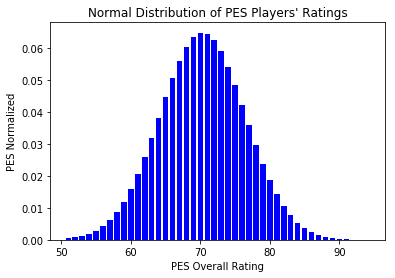

In [38]:
## A bar chart of the normalized PES 2019 ratings
plt.bar("PES Overall Rating", "PES Normalized", data = df_combo3, color = "blue")
plt.xlabel("PES Overall Rating")
plt.ylabel("PES Normalized")
plt.title("Normal Distribution of PES Players' Ratings")
plt.show()

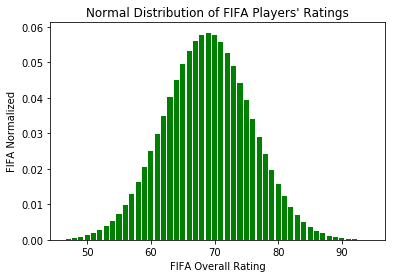

In [39]:
## A bar chart of the normalized FIFA 19 ratings
plt.bar("FIFA Overall Rating", "FIFA Normalized", data = df_combo3, color = "green")
plt.xlabel("FIFA Overall Rating")
plt.ylabel("FIFA Normalized")
plt.title("Normal Distribution of FIFA Players' Ratings")
plt.show()

In [40]:
line = linear_model.LinearRegression() 

In [41]:
df_combofifa = df_combo3.loc[:, "PES Overall Rating"].values.reshape(-1, 1) 
df_combopes = df_combo3.loc[:, "FIFA Overall Rating"].values.reshape(-1, 1) 

In [42]:
line.fit(df_combofifa,df_combopes) 
pred = line.predict(df_combofifa)

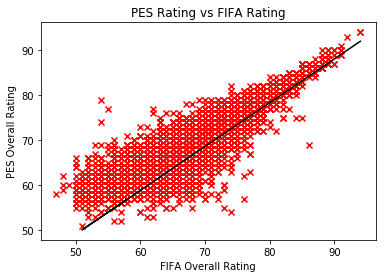

In [43]:
## A scatter plot of PES ratings vs FIFA ratings
plt.scatter('FIFA Overall Rating', 'PES Overall Rating', data = df_combo3, marker = 'x', color = 'red')
plt.xlabel("FIFA Overall Rating")
plt.ylabel("PES Overall Rating")
plt.plot(df_combofifa, pred, color='black')
plt.title("PES Rating vs FIFA Rating")
plt.show()

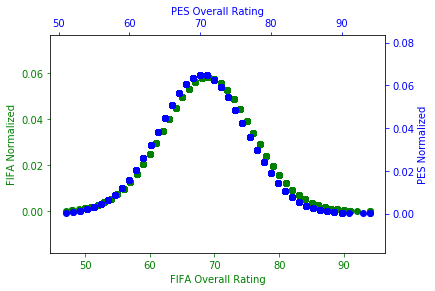

In [44]:
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.scatter(df_combo3["FIFA Overall Rating"], df_combo3["FIFA Normalized"], color="green")
ax.set_xlabel("FIFA Overall Rating", color="green")
ax.set_ylabel("FIFA Normalized", color="green")
ax.tick_params(axis='x', colors="green")
ax.tick_params(axis='y', colors="green")

ax2.scatter(df_combo3["PES Overall Rating"], df_combo3["PES Normalized"], color="blue")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('PES Overall Rating', color="blue") 
ax2.set_ylabel('PES Normalized', color="blue")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors= "blue")
ax2.tick_params(axis='y', colors= "blue")

plt.show()